# **Data Analysis on Book Sales Data**

## Step 1: Import Libraries

In [27]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Step 2: Load the Data

In [2]:
# Load CSV files
file_1 = '/kaggle/input/list-of-best-selling-books/table_1.csv'
file_2 = '/kaggle/input/list-of-best-selling-books/table_2.csv'
file_3 = '/kaggle/input/list-of-best-selling-books/table_3.csv'
file_4 = '/kaggle/input/list-of-best-selling-books/table_4.csv'
file_5 = '/kaggle/input/list-of-best-selling-books/table_5.csv'
file_6 = '/kaggle/input/list-of-best-selling-books/table_6.csv'
file_7 = '/kaggle/input/list-of-best-selling-books/table_7.csv'
file_8 = '/kaggle/input/list-of-best-selling-books/table_8.csv'
file_9 = '/kaggle/input/list-of-best-selling-books/table_9.csv'
file_10 = '/kaggle/input/list-of-best-selling-books/table_10.csv'
file_11 = '/kaggle/input/list-of-best-selling-books/table_11.csv'
file_12 = '/kaggle/input/list-of-best-selling-books/table_12.csv'
file_13 = '/kaggle/input/list-of-best-selling-books/table_13.csv'
file_14 = '/kaggle/input/list-of-best-selling-books/table_14.csv'

In [3]:
# Read CSV files into DataFrames
df1 = pd.read_csv(file_1)
df2 = pd.read_csv(file_2)
df3 = pd.read_csv(file_3)
df4 = pd.read_csv(file_4)
df5 = pd.read_csv(file_5)
df6 = pd.read_csv(file_6)
df7 = pd.read_csv(file_7)
df8 = pd.read_csv(file_8)
df9 = pd.read_csv(file_9)
df10 = pd.read_csv(file_10)
df11 = pd.read_csv(file_11)
df12 = pd.read_csv(file_12)
df13 = pd.read_csv(file_13)
df14 = pd.read_csv(file_14)

## Step 3: Combine DataFrames

In [4]:
# List of best-selling individual books - 4
# List of best-selling book series - 5
# List of best-selling regularly updated books - 5
individual_books_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
book_series_df = pd.concat([df5, df6, df7, df8, df9], ignore_index=True)
updated_books_df = pd.concat([df10, df11, df12, df13, df14], ignore_index=True)

In [5]:
individual_books_df.head()

,Book,Author(s),Original language,First published,Approximate sales,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,>200 million [20],Historical fiction
1,The Little Prince ( Le Petit Prince ),Antoine de Saint-Exupéry,French,1943,200 million [21] [22] [23],"Fantasy , children's fiction"
2,The Alchemist ( O Alquimista ),Paulo Coelho,Portuguese,1988,150 million [24] [25],Fantasy
3,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120 million [26] [27],"Fantasy , children's fiction"
4,And Then There Were None,Agatha Christie,English,1939,100 million [28],Mystery


In [6]:
book_series_df.head()

,Book series,Author(s),Original language,No. of installments,Years of Publication,Approximate sales,First published,Genre,No. of instalments
0,Harry Potter,J. K. Rowling,English,7 + 3 companion books + 4 scripts,1997–2007,600 million [13],NaN,NaN,NaN
1,Goosebumps,R. L. Stine,English,62 + spin-off series,1992–present,400 million [189],NaN,NaN,NaN
2,Perry Mason,Erle Stanley Gardner,English,82 + 4 short stories,1933–1973,300 million [190],NaN,NaN,NaN
3,Diary of a Wimpy Kid,Jeff Kinney,English,18 + 5 spin-offs,2007–present,275 million [191],NaN,NaN,NaN
4,Berenstain Bears,Stan and Jan Berenstain,English,428,1962–present,260 million [192],NaN,NaN,NaN


In [7]:
updated_books_df.head()

,Book,Author(s),Original language,First published,Approximate sales
0,新华字典 ( Xinhua Zidian / Xinhua Dictionary),Chief editor: Wei Jiangong,Chinese,1957,567 million [323]
1,Scouting for Boys,Robert Baden-Powell,English,1908,100–150 million [324]
2,The McGuffey Readers,William Holmes McGuffey,English,1853,125 million [325]
3,Guinness World Records (published every year),Various authors,English,1955,115 million [326]
4,六星占術によるあなたの運命 ( Rokusei Senjutsu (Six-Star As...,Kazuko Hosoki Kaori Hosoki,Japanese,1986,101.2 million [327]


## Step 4: Exploratory Data Analysis

## Summary statistics of the dataset

In [8]:
individual_books_df.describe(include='all')

,Book,Author(s),Original language,First published,Approximate sales,Genre
count,167,167,167,167,167,112
unique,167,150,15,126,163,73
top,A Tale of Two Cities,J. K. Rowling,English,1988,65 million [37],Novel
freq,1,7,125,3,5,9


In [9]:
book_series_df.describe(include='all')

,Book series,Author(s),Original language,No. of installments,Years of Publication,Approximate sales,First published,Genre,No. of instalments
count,126,126,126,106,33,126,93,7,16.000000
unique,126,118,11,79,30,126,78,5,NaN
top,Harry Potter,Various authors,English,6,1997–present,600 million [13],1992–present,Children's Literature,NaN
freq,1,8,86,4,2,1,4,2,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.687500
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.706632
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.250000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.750000


In [10]:
updated_books_df.describe(include='all')

,Book,Author(s),Original language,First published,Approximate sales
count,33,31,33,33,33
unique,33,24,6,31,33
top,新华字典 ( Xinhua Zidian / Xinhua Dictionary),Various authors,English,1960,567 million [323]
freq,1,8,14,2,1


## Data types of each column

In [11]:
individual_books_df.dtypes

Book                 object
Author(s)            object
Original language    object
First published      object
Approximate sales    object
Genre                object
dtype: object

In [12]:
book_series_df.dtypes

Book series              object
Author(s)                object
Original language        object
No. of installments      object
Years of Publication     object
Approximate sales        object
First published          object
Genre                    object
No. of instalments      float64
dtype: object

In [13]:
updated_books_df.dtypes

Book                 object
Author(s)            object
Original language    object
First published      object
Approximate sales    object
dtype: object

## Check for missing values

In [14]:
individual_books_df.isnull().sum()

Book                  0
Author(s)             0
Original language     0
First published       0
Approximate sales     0
Genre                55
dtype: int64

In [15]:
book_series_df.isnull().sum()

Book series               0
Author(s)                 0
Original language         0
No. of installments      20
Years of Publication     93
Approximate sales         0
First published          33
Genre                   119
No. of instalments      110
dtype: int64

In [16]:
updated_books_df.isnull().sum()

Book                 0
Author(s)            2
Original language    0
First published      0
Approximate sales    0
dtype: int64

## Step 5: Data Visualization

## Visualization before handling missing values

Text(0.5, 1.0, 'individual_books_df')

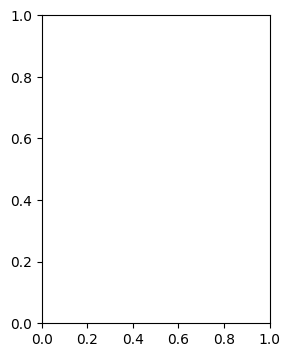

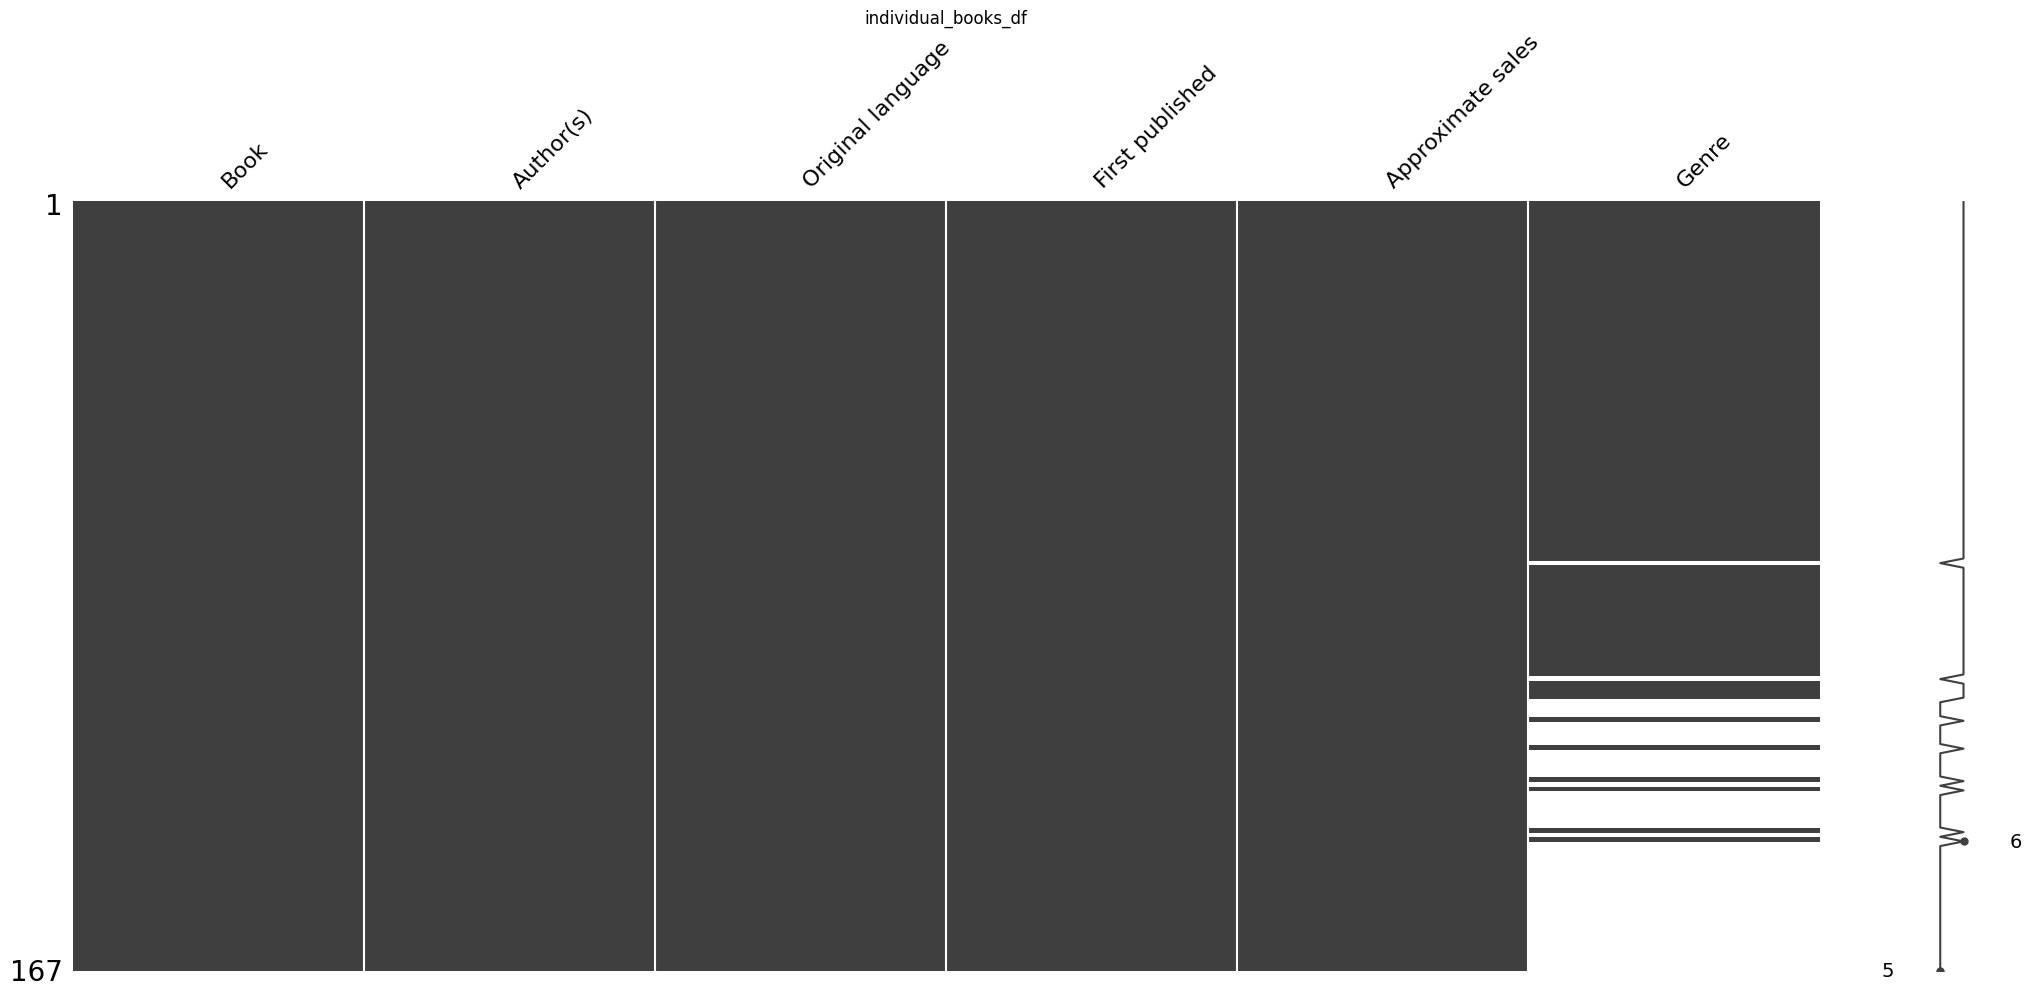

In [17]:
plt.figure(figsize=(10, 4))
plt.subplot(131)
msno.matrix(individual_books_df)
plt.title("individual_books_df")

Text(0.5, 1.0, 'book_series_df')

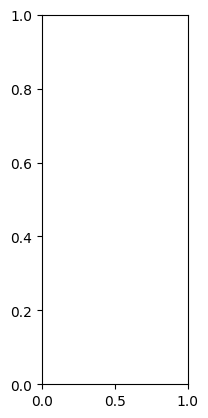

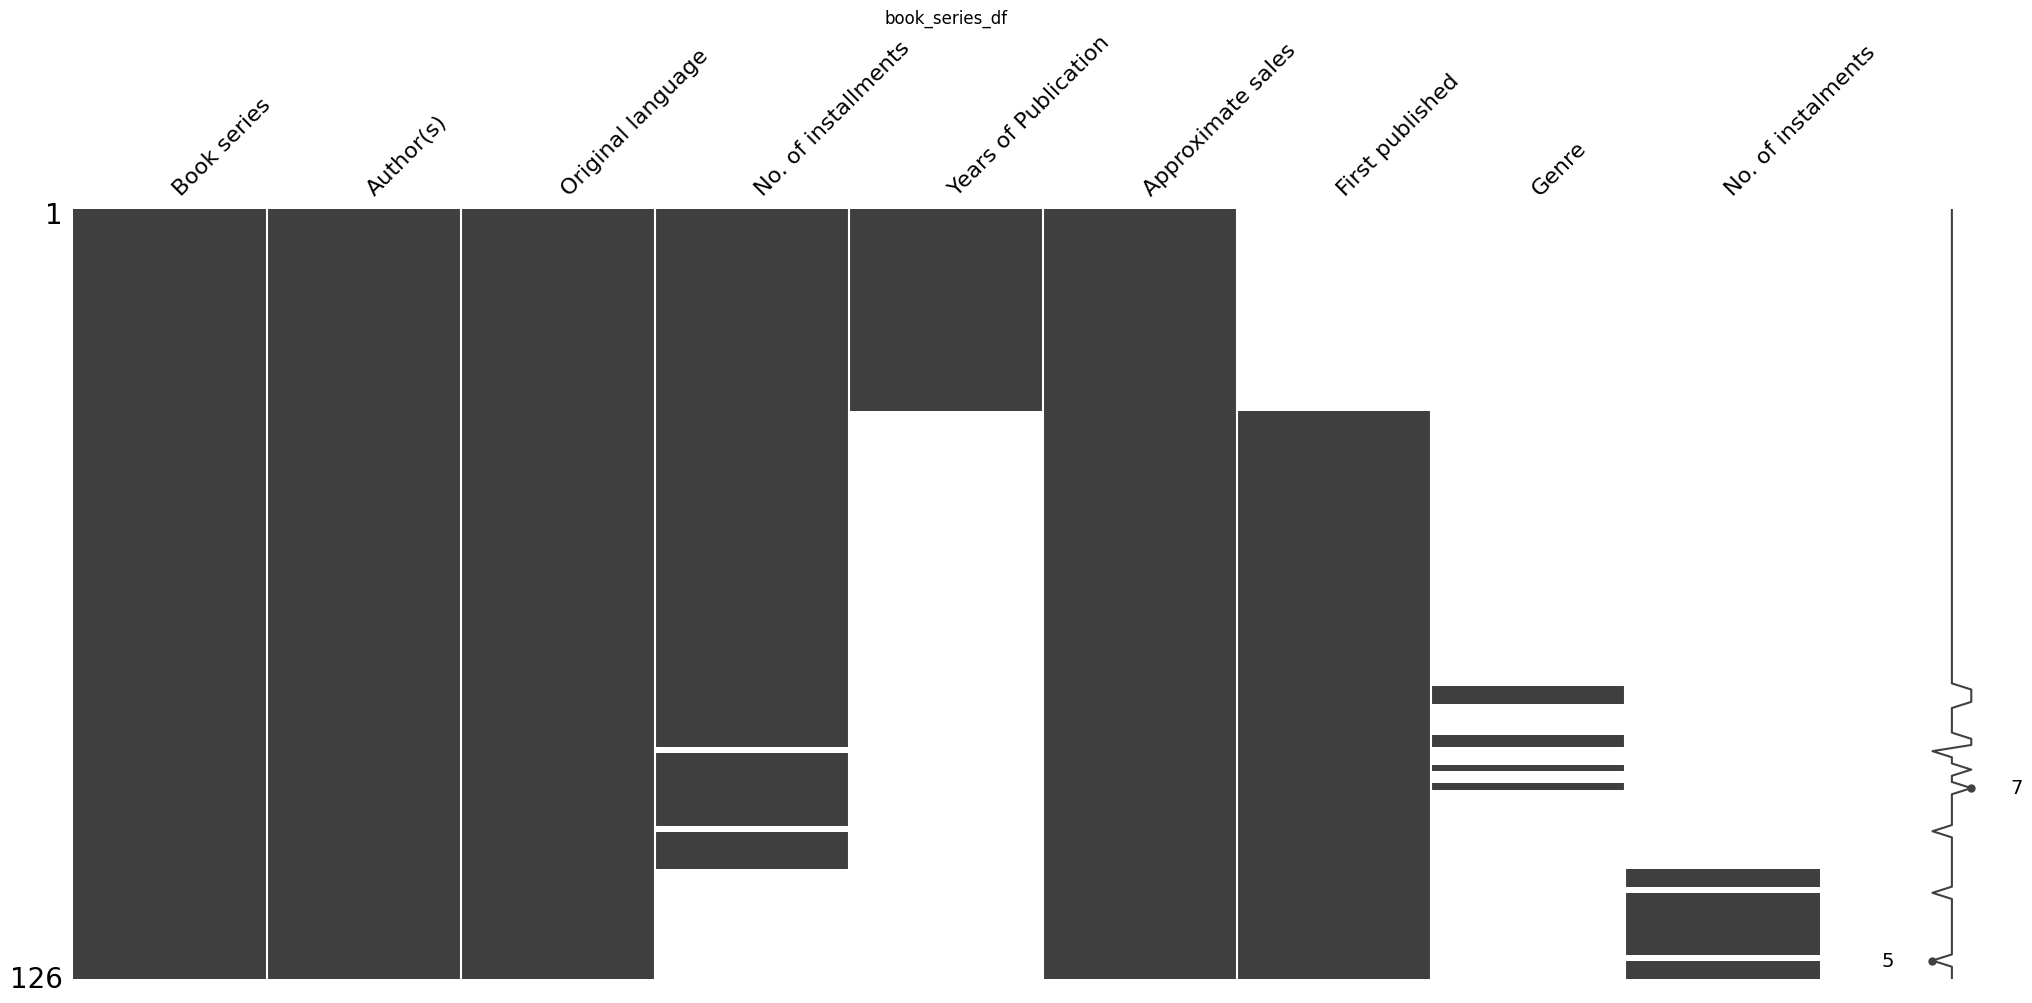

In [18]:
plt.subplot(132)
msno.matrix(book_series_df)
plt.title("book_series_df")

Text(0.5, 1.0, 'updated_books_df')

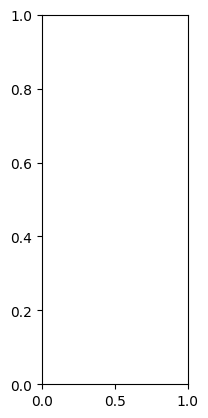

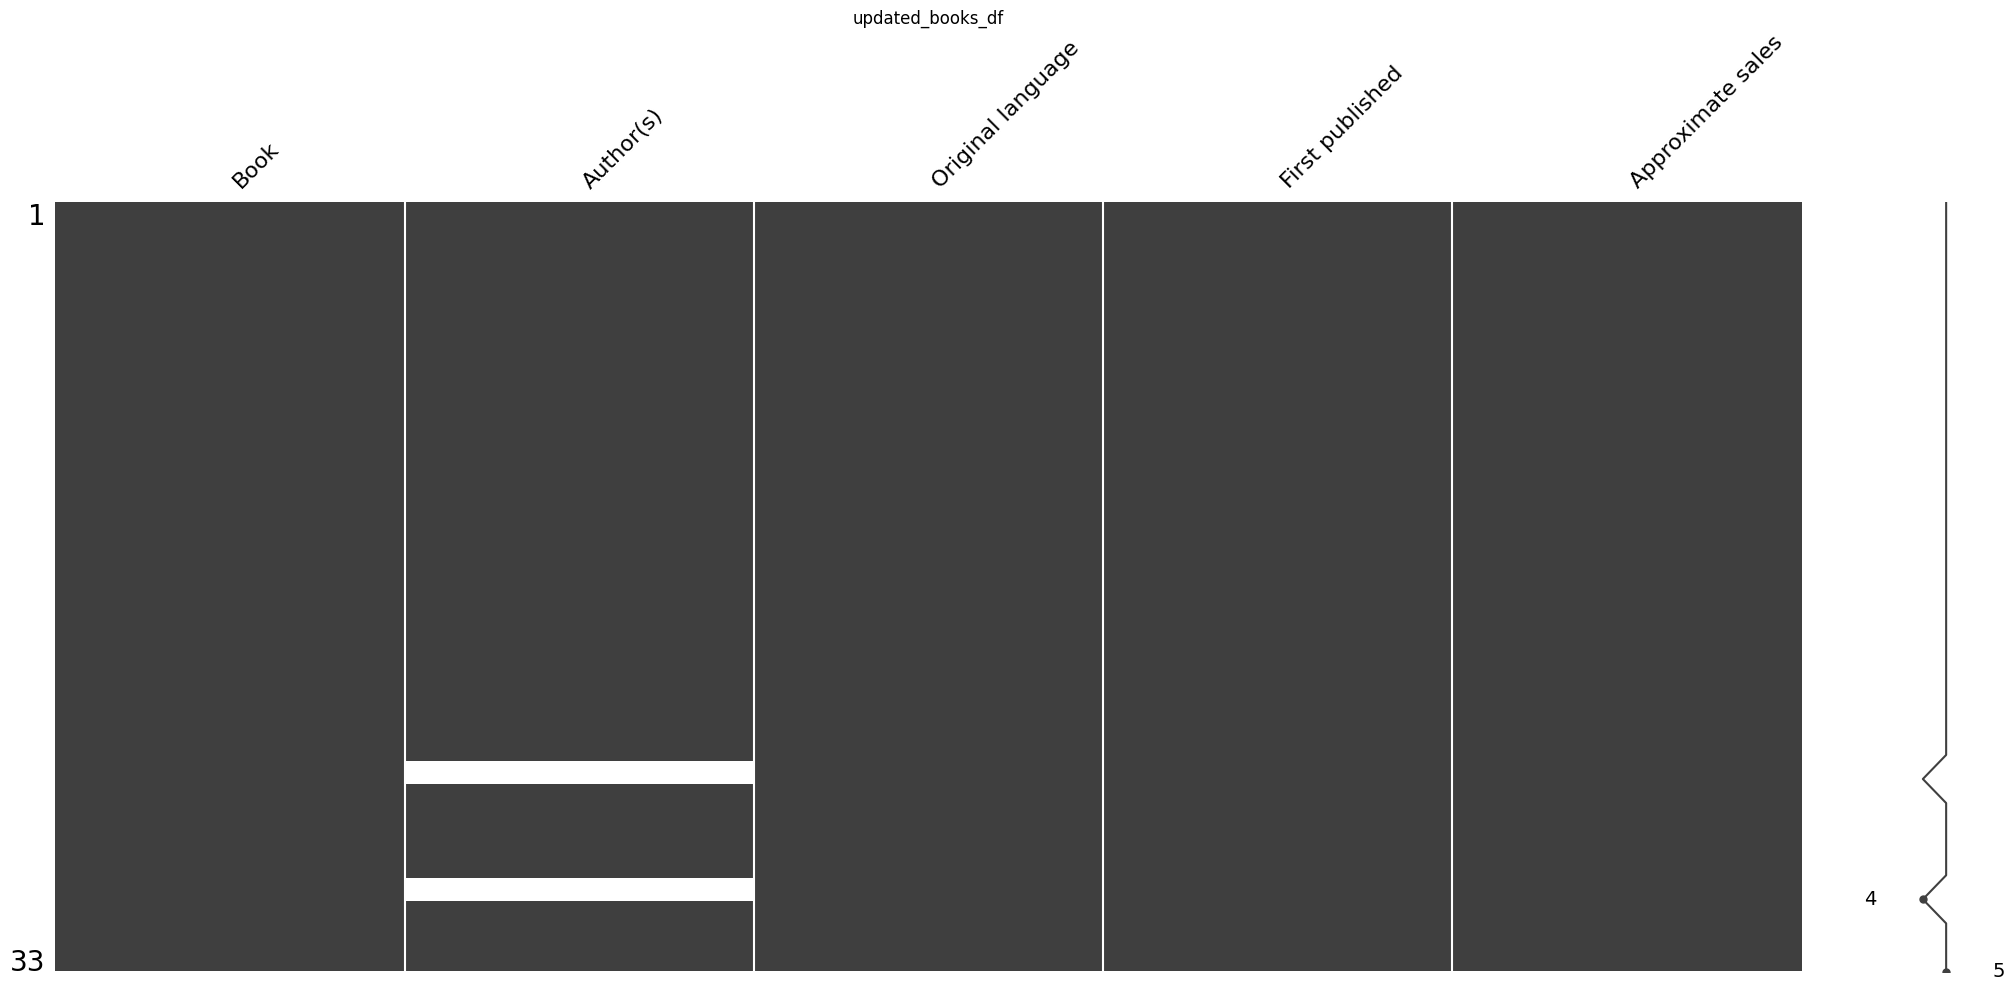

In [19]:
plt.subplot(133)
msno.matrix(updated_books_df)
plt.title("updated_books_df")

In [21]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

## Step 6: Handling Missing Values

In [22]:
# For individual_books_df
# Impute missing Genre with a placeholder
individual_books_df['Genre'].fillna('Unknown', inplace=True)

/tmp/ipykernel_134/3627344201.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  individual_books_df['Genre'].fillna('Unknown', inplace=True)


In [23]:
individual_books_df.isnull().sum()

Book                 0
Author(s)            0
Original language    0
First published      0
Approximate sales    0
Genre                0
dtype: int64

In [32]:
book_series_df.isnull().sum()

Book series             0
Author(s)               0
Original language       0
No. of installments     0
Years of Publication    0
Approximate sales       0
First published         0
Genre                   0
No. of instalments      0
dtype: int64

In [33]:
updated_books_df.isnull().sum()

Book                 0
Author(s)            0
Original language    0
First published      0
Approximate sales    0
dtype: int64

In [24]:
# For book_series_df
# Impute missing values with placeholders or remove them
book_series_df['No. of installments'].fillna(0, inplace=True)  # Assuming 0 if not available
book_series_df['Years of Publication'].fillna('Unknown', inplace=True)
book_series_df['First published'].fillna('Unknown', inplace=True)
book_series_df['Genre'].fillna('Unknown', inplace=True)
book_series_df['No. of instalments'].fillna(0, inplace=True)  # Assuming 0 if not available

/tmp/ipykernel_134/1329545304.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  book_series_df['No. of installments'].fillna(0, inplace=True)  # Assuming 0 if not available
/tmp/ipykernel_134/1329545304.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [25]:
# Impute missing Author(s) with 'Unknown'
updated_books_df['Author(s)'].fillna('Unknown', inplace=True)

/tmp/ipykernel_134/2828397774.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  updated_books_df['Author(s)'].fillna('Unknown', inplace=True)
